
## Predictive Machine Learning Boston Housing

In [1]:
# Load libraries
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
# Load Boston housing dataset
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
housing= pd.read_csv(filename, delim_whitespace=True, names=names)

## Analyze Data 

In [3]:
#shape
print(housing.shape)

(506, 14)


In [4]:
# types
print(housing.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.width=None
pd.set_option('display.max_rows', None)

In [6]:
#head of the data
print(housing.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [7]:
#summary of data
pd.set_option('precision', 1)
print(housing.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [8]:
## correlation
pd.set_option('precision', 2)
print(housing.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

## Data Visualizations

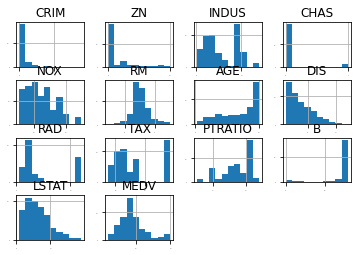

In [9]:
## histograms
housing.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

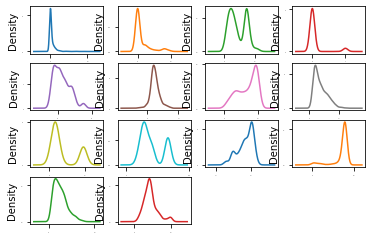

In [10]:
# density distribution
housing.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
plt.show()

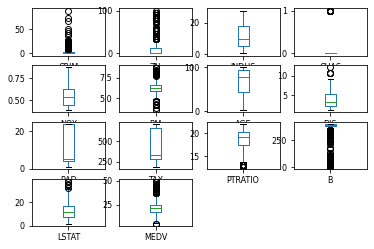

In [11]:
# box and whisker plots
housing.plot(kind='box', subplots= True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
plt.show()

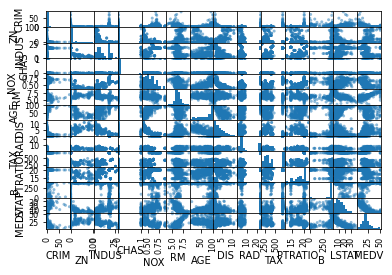

In [12]:
# scatter plot matrix
pd.plotting.scatter_matrix(housing)
plt.show()

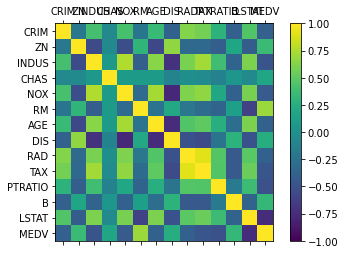

In [13]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(housing.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Splitting data to training and validation set

In [14]:
# Split-out validation dataset
data = housing.values
X = data[:,0:13]
Y = data[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

In [15]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits= num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', -21.379855726678684, 9.414263656984774)
('LASSO', -26.42356110840965, 11.651109915777912)
('EN', -27.50225935066171, 12.305022264112703)
('KNN', -41.89648839024391, 13.901688149849864)
('CART', -26.218442682926828, 12.566283898229234)
('SVR', -67.8278859731828, 29.049137595262604)


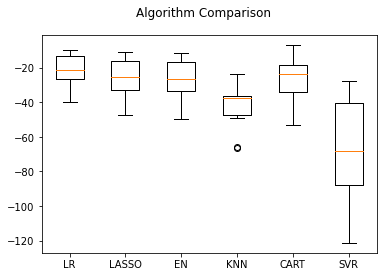

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [20]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits= num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledLR', -21.379855726678567, 9.414263656984714)
('ScaledLASSO', -26.607313557676616, 8.97876148589026)
('ScaledEN', -27.932372158135518, 10.587490490139404)
('ScaledKNN', -20.107620487804876, 12.376949150820472)
('ScaledCART', -27.125306707317073, 11.539582615009486)
('ScaledSVR', -29.633085500303213, 17.009186052351556)


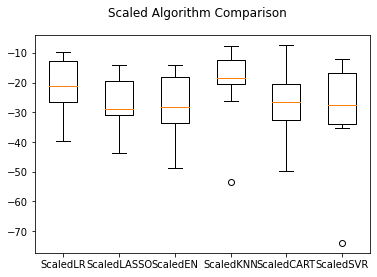

In [21]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Improve Results With Tuning of KNN

In [22]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)

grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring= scoring, cv=num_folds)
grid_result = grid.fit(rescaledX, y_train)

In [23]:
#check top performing n_neighbors value
grid_result.best_params_

{'n_neighbors': 3}

In [24]:
#check mean score for the top performing value of n_neighbors
grid_result.best_score_

-18.10930386178861

## Ensemble Methods

In [25]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))

In [26]:
# evaluate each model in turn
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits= num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=num_folds, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('ScaledAB', -14.599201449596174, 6.023199773712548)
('ScaledGBM', -9.956189704649493, 4.437696247620665)
('ScaledRF', -11.931375832682924, 6.178777148196626)
('ScaledET', -9.173074689451212, 5.399010001260911)


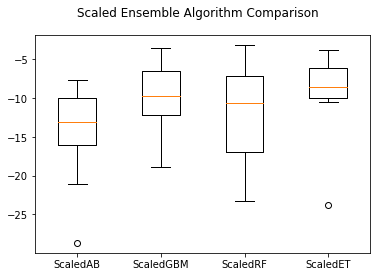

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tune Ensemble Methods

In [28]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=num_folds)
grid_result = grid.fit(rescaledX, y_train)

In [29]:
print (grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print((mean, stdev, param))

-9.379670170496617 {'n_estimators': 400}
(-10.81317898995185, 4.856737689847266, {'n_estimators': 50})
(-10.05737463176326, 4.566985660906948, {'n_estimators': 100})
(-9.718097089502923, 4.404729796863916, {'n_estimators': 150})
(-9.565306137539435, 4.394354546704491, {'n_estimators': 200})
(-9.47700689962922, 4.376432585897791, {'n_estimators': 250})
(-9.453795037052945, 4.385228261973382, {'n_estimators': 300})
(-9.394901329520659, 4.367860388994963, {'n_estimators': 350})
(-9.379670170496617, 4.3820007612639555, {'n_estimators': 400})


In [30]:
## Finalize Model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = grid_result.best_estimator_
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [31]:
# transform the validation dataset
rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)
print(mean_squared_error(y_test, predictions))

11.902132586880027


##### We can see that the estimated mean squared error is 11.9, close to our estimate of 9.4

In [37]:
attributes = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
feature_importances = grid_result.best_estimator_.feature_importances_

In [38]:
feature_importances

array([2.42199820e-02, 3.32123007e-04, 4.39531830e-03, 3.96410406e-04,
       3.91481098e-02, 4.42603825e-01, 1.04557545e-02, 5.53109743e-02,
       2.35939505e-03, 1.40584779e-02, 2.50259316e-02, 1.00891044e-02,
       3.71604594e-01])

In [39]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4426038247324852, 'RM'),
 (0.37160459407721186, 'LSTAT'),
 (0.05531097428496937, 'DIS'),
 (0.03914810976141557, 'NOX'),
 (0.025025931566547203, 'PTRATIO'),
 (0.024219981955790473, 'CRIM'),
 (0.014058477894402418, 'TAX'),
 (0.010455754523994948, 'AGE'),
 (0.010089104441462991, 'B'),
 (0.0043953183033292155, 'INDUS'),
 (0.0023593950455813107, 'RAD'),
 (0.00039641040585532123, 'CHAS'),
 (0.00033212300695404436, 'ZN')]